Text(0.5, 0, 'iteration')

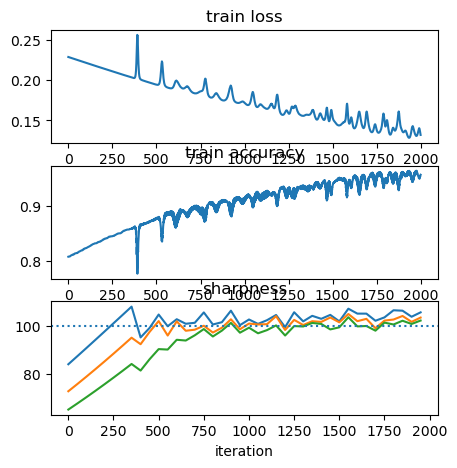

In [20]:
import torch
import matplotlib.pyplot as plt
from os import environ
import os


os.environ['DATASETS'] = "/home/gridsan/mjafarinodeh/Sharpness/data"
os.environ['RESULTS'] = "/home/gridsan/mjafarinodeh/Sharpness/results"

# configs = [
#     ("cifar10-10k", "fc-tanh-depth2", "mse", 0.02),
#     ("cifar10-10k", "resnet-32", "mse", 0.02),
#     ("cifar10-10k", "resnet32", "mse", 0.02),
#     ("cifar10-1k", "cnn-relu", "ce", 0.02),
#     ("cifar10-1k", "cnn-relu", "mse", 0.02),
#     ("cifar10-1k", "cnn-tanh", "mse", 0.02),
#     ("cifar10-1k", "fc-relu", "ce", 0.02),
#     ("cifar10-5k", "fc-tanh", "mse", 0.01),
#     ("cifar10-5k", "fc-tanh", "mse", 0.04),
#     ("cifar10-vit-10k", "vit", "mse", 0.02),
#     ("cifar10-vit-1k", "vit", "ce", 0.02),
#     ("cifar10-vit-1k", "vit", "mse", 0.02),
#     ("cifar10-vit-20k", "vit", "ce", 0.02),
#     ("cifar10", "cnn-bn-tanh", "ce", 0.02),
#     ("cifar10", "cnn-bn-tanh", "ce", 0.04),
#     ("cifar10", "cnn-relu", "ce", 0.02),
#     ("cifar10", "cnn-relu", "ce", 0.04),
#     ("cifar10", "cnn-tanh", "ce", 0.02),
#     ("cifar10", "cnn-tanh", "ce", 0.04),
#     ("cifar10", "fc-tanh-depth3", "ce", 0.02),
#     ("cifar10", "fc-tanh-depth3", "ce", 0.04)
# ]

dataset = "cifar10-5k"
arch = "fc-gelu"
loss = "mse"
gd_lr = 0.02
gd_eig_freq = 50

gd_directory = f"{environ['RESULTS']}/{dataset}/{arch}/seed_0/{loss}/gd/lr_{gd_lr}"

gd_train_loss = torch.load(f"{gd_directory}/train_loss_final")
gd_train_acc = torch.load(f"{gd_directory}/train_acc_final")
gd_sharpness = torch.load(f"{gd_directory}/eigs_final")[40:80,0]
gd_sharpness1 = torch.load(f"{gd_directory}/eigs_final")[40:80,1]
gd_sharpness2 = torch.load(f"{gd_directory}/eigs_final")[40:80,2]


plt.figure(figsize=(5, 5), dpi=100)

plt.subplot(3, 1, 1)
plt.plot(gd_train_loss[2000:4000])
plt.title("train loss")

plt.subplot(3, 1, 2)
plt.plot(gd_train_acc[2000:4000])
plt.title("train accuracy")

plt.subplot(3, 1, 3)
plt.plot(torch.arange(len(gd_sharpness)) * gd_eig_freq, gd_sharpness)
plt.plot(torch.arange(len(gd_sharpness)) * gd_eig_freq, gd_sharpness1)
plt.plot(torch.arange(len(gd_sharpness)) * gd_eig_freq, gd_sharpness2)

plt.axhline(2. / gd_lr, linestyle='dotted')
plt.title("sharpness")
plt.xlabel("iteration")

In [1]:
from os import environ
environ['RESULTS'] = DATASETS="$HOME/Sharpness/data"
!export RESULTS="$HOME/Sharpness/results"

print(environ['RESULTS'])

$HOME/Sharpness/data


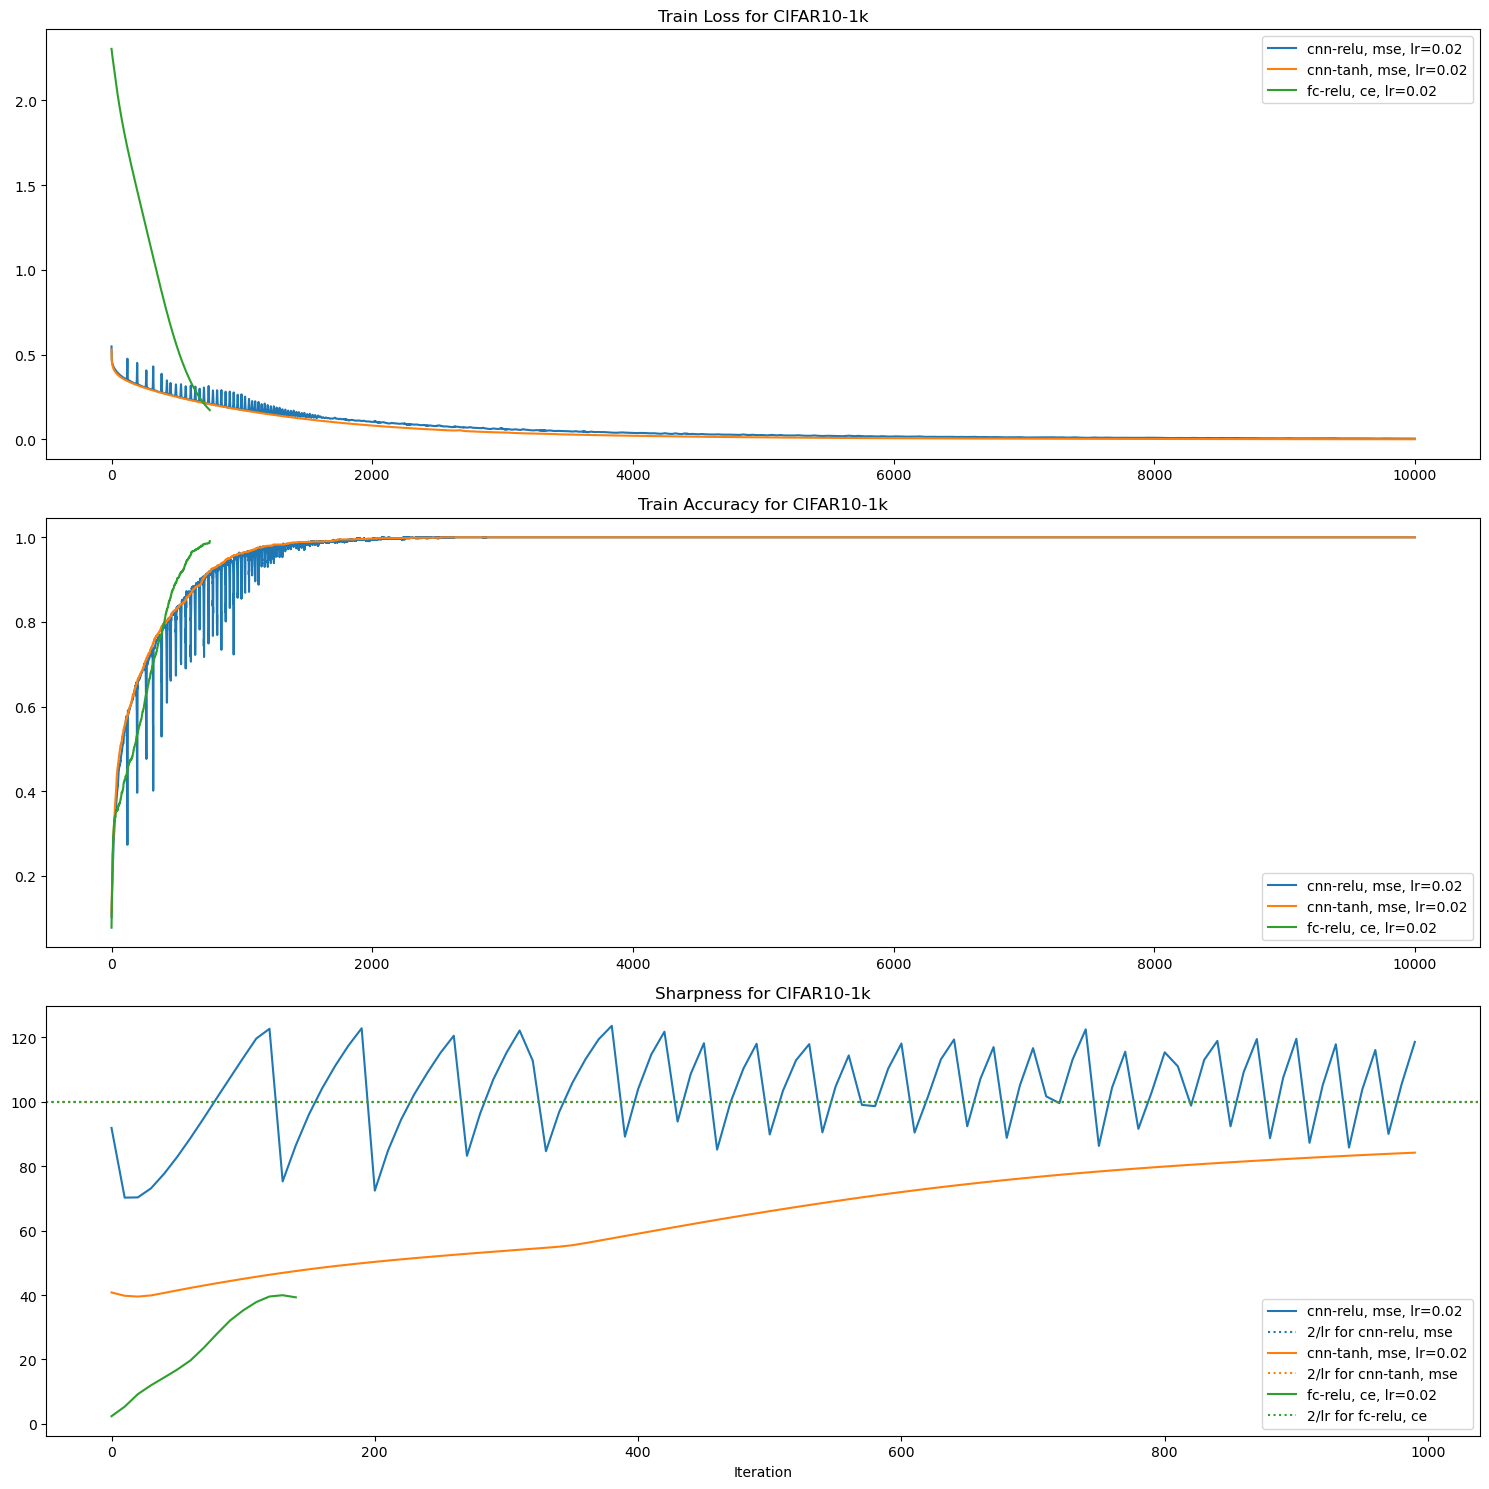

In [3]:
cifar10_1k_configs = [
    ("cifar10-1k", "cnn-relu", "ce", 0.02),
    ("cifar10-1k", "cnn-relu", "mse", 0.02),
    ("cifar10-1k", "cnn-tanh", "mse", 0.02),
    ("cifar10-1k", "fc-relu", "ce", 0.02)
]

plt.figure(figsize=(15, 15), dpi=100)

# Plot train loss
plt.subplot(3, 1, 1)
for dataset, arch, loss, lr in cifar10_1k_configs:
    gd_directory = f"{environ['RESULTS']}/{dataset}/{arch}/seed_0/{loss}/gd/lr_{lr}"
    if os.path.exists(f"{gd_directory}/train_loss_final"):
        gd_train_loss = torch.load(f"{gd_directory}/train_loss_final")
        plt.plot(gd_train_loss[:], label=f"{arch}, {loss}, lr={lr}")
plt.title("Train Loss for CIFAR10-1k")
plt.legend()

# Plot train accuracy
plt.subplot(3, 1, 2)
for dataset, arch, loss, lr in cifar10_1k_configs:
    gd_directory = f"{environ['RESULTS']}/{dataset}/{arch}/seed_0/{loss}/gd/lr_{lr}"
    if os.path.exists(f"{gd_directory}/train_acc_final"):
        gd_train_acc = torch.load(f"{gd_directory}/train_acc_final")
        plt.plot(gd_train_acc[:], label=f"{arch}, {loss}, lr={lr}")
plt.title("Train Accuracy for CIFAR10-1k")
plt.legend()

# Plot sharpness
plt.subplot(3, 1, 3)
gd_eig_freq = 10  # Assuming this is the same for all configs
for dataset, arch, loss, lr in cifar10_1k_configs:
    gd_directory = f"{environ['RESULTS']}/{dataset}/{arch}/seed_0/{loss}/gd/lr_{lr}"
    if os.path.exists(f"{gd_directory}/eigs_final"):
        gd_sharpness = torch.load(f"{gd_directory}/eigs_final")[:100, 0]
        plt.plot(torch.arange(len(gd_sharpness)) * gd_eig_freq, gd_sharpness, label=f"{arch}, {loss}, lr={lr}")
        plt.axhline(2. / lr, linestyle='dotted', color=plt.gca().lines[-1].get_color(), label=f"2/lr for {arch}, {loss}")
plt.title("Sharpness for CIFAR10-1k")
plt.xlabel("Iteration")
plt.legend()

plt.tight_layout()
# plt.savefig("cifar10_1k_results.png")
plt.show()

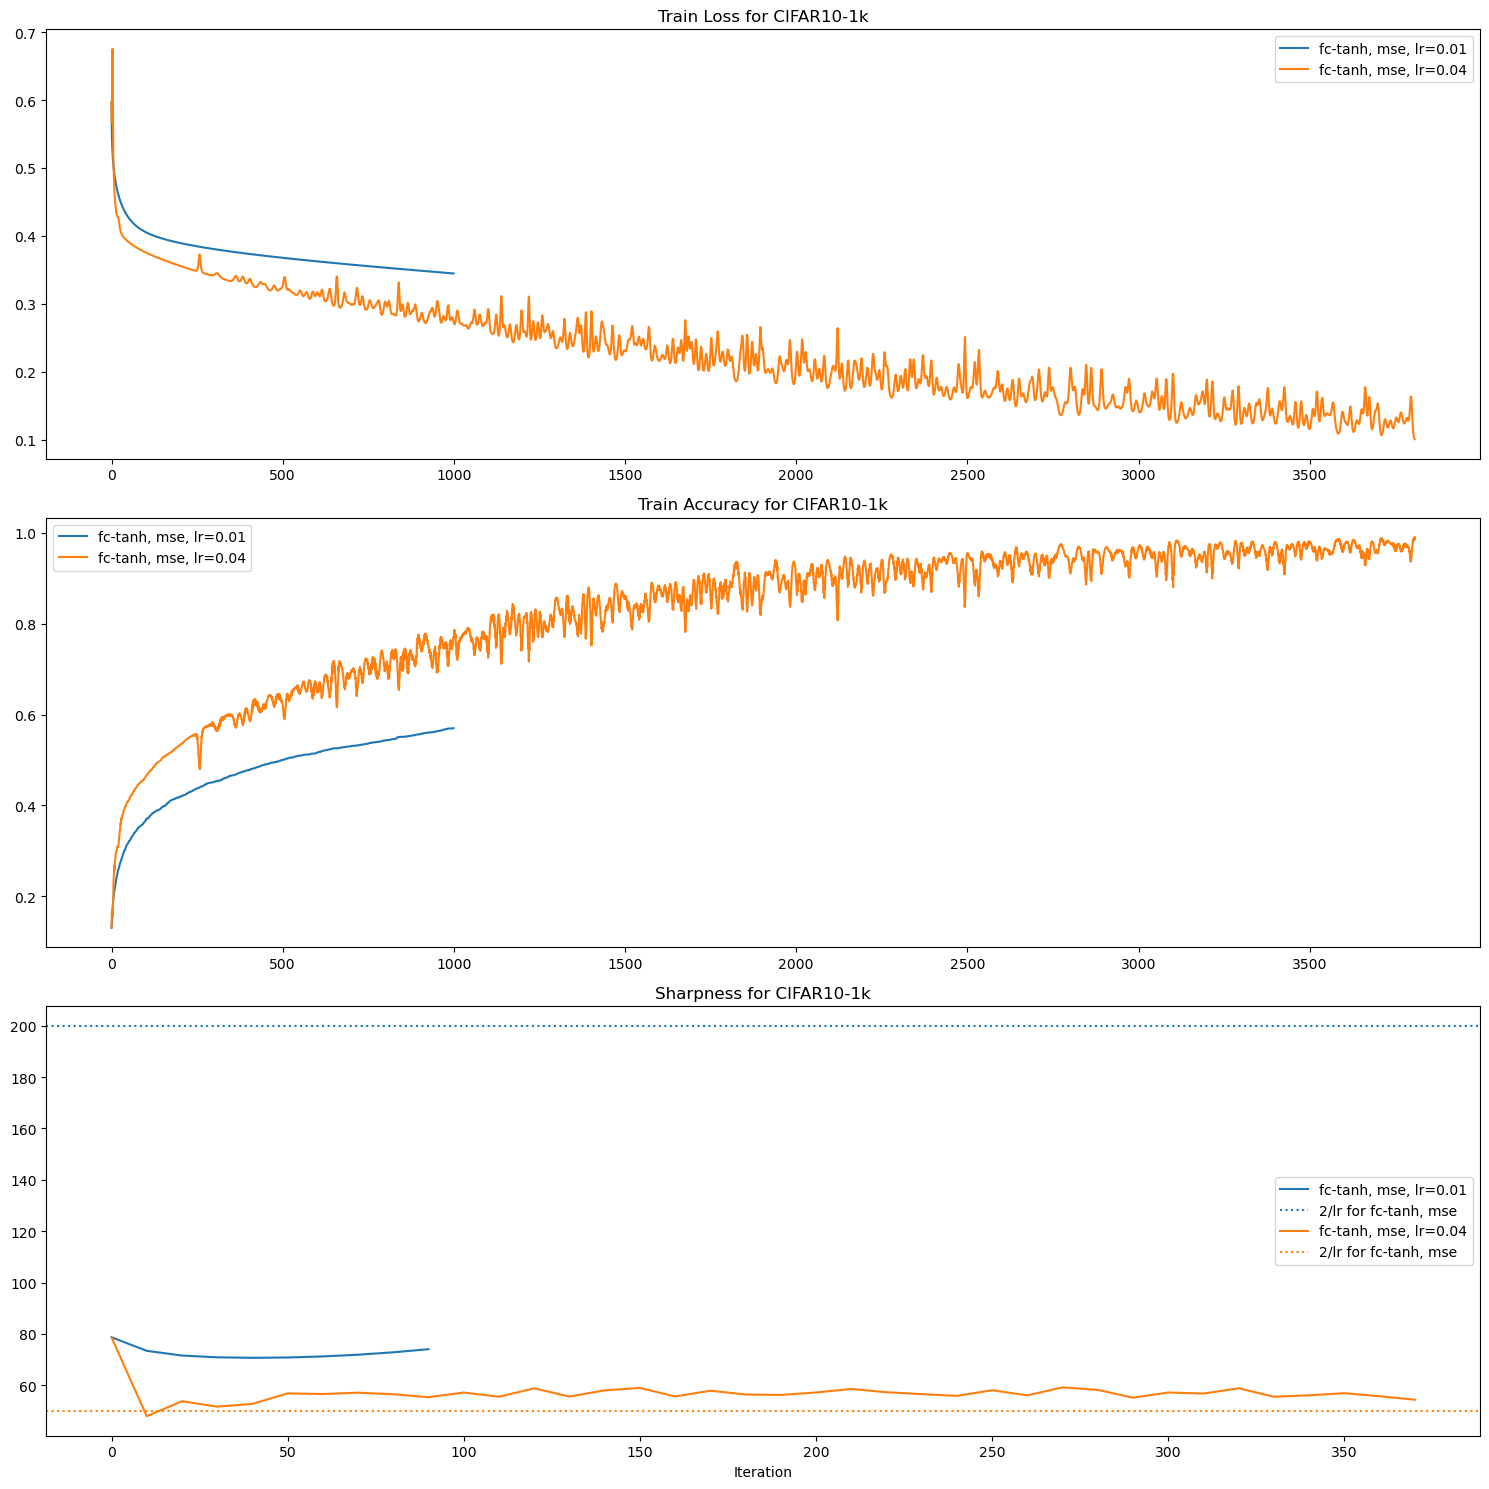

In [4]:
cifar10_1k_configs = [
    ("cifar10-5k", "fc-tanh", "mse", 0.01),
    ("cifar10-5k", "fc-tanh", "mse", 0.04)
]

plt.figure(figsize=(15, 15), dpi=100)

# Plot train loss
plt.subplot(3, 1, 1)
for dataset, arch, loss, lr in cifar10_1k_configs:
    gd_directory = f"{environ['RESULTS']}/{dataset}/{arch}/seed_0/{loss}/gd/lr_{lr}"
    if os.path.exists(f"{gd_directory}/train_loss_final"):
        gd_train_loss = torch.load(f"{gd_directory}/train_loss_final")
        plt.plot(gd_train_loss[:], label=f"{arch}, {loss}, lr={lr}")
plt.title("Train Loss for CIFAR10-1k")
plt.legend()

# Plot train accuracy
plt.subplot(3, 1, 2)
for dataset, arch, loss, lr in cifar10_1k_configs:
    gd_directory = f"{environ['RESULTS']}/{dataset}/{arch}/seed_0/{loss}/gd/lr_{lr}"
    if os.path.exists(f"{gd_directory}/train_acc_final"):
        gd_train_acc = torch.load(f"{gd_directory}/train_acc_final")
        plt.plot(gd_train_acc[:], label=f"{arch}, {loss}, lr={lr}")
plt.title("Train Accuracy for CIFAR10-1k")
plt.legend()

# Plot sharpness
plt.subplot(3, 1, 3)
gd_eig_freq = 10  # Assuming this is the same for all configs
for dataset, arch, loss, lr in cifar10_1k_configs:
    gd_directory = f"{environ['RESULTS']}/{dataset}/{arch}/seed_0/{loss}/gd/lr_{lr}"
    if os.path.exists(f"{gd_directory}/eigs_final"):
        gd_sharpness = torch.load(f"{gd_directory}/eigs_final")[:100, 0]
        plt.plot(torch.arange(len(gd_sharpness)) * gd_eig_freq, gd_sharpness, label=f"{arch}, {loss}, lr={lr}")
        plt.axhline(2. / lr, linestyle='dotted', color=plt.gca().lines[-1].get_color(), label=f"2/lr for {arch}, {loss}")
plt.title("Sharpness for CIFAR10-1k")
plt.xlabel("Iteration")
plt.legend()

plt.tight_layout()
# plt.savefig("cifar10_1k_results.png")
plt.show()

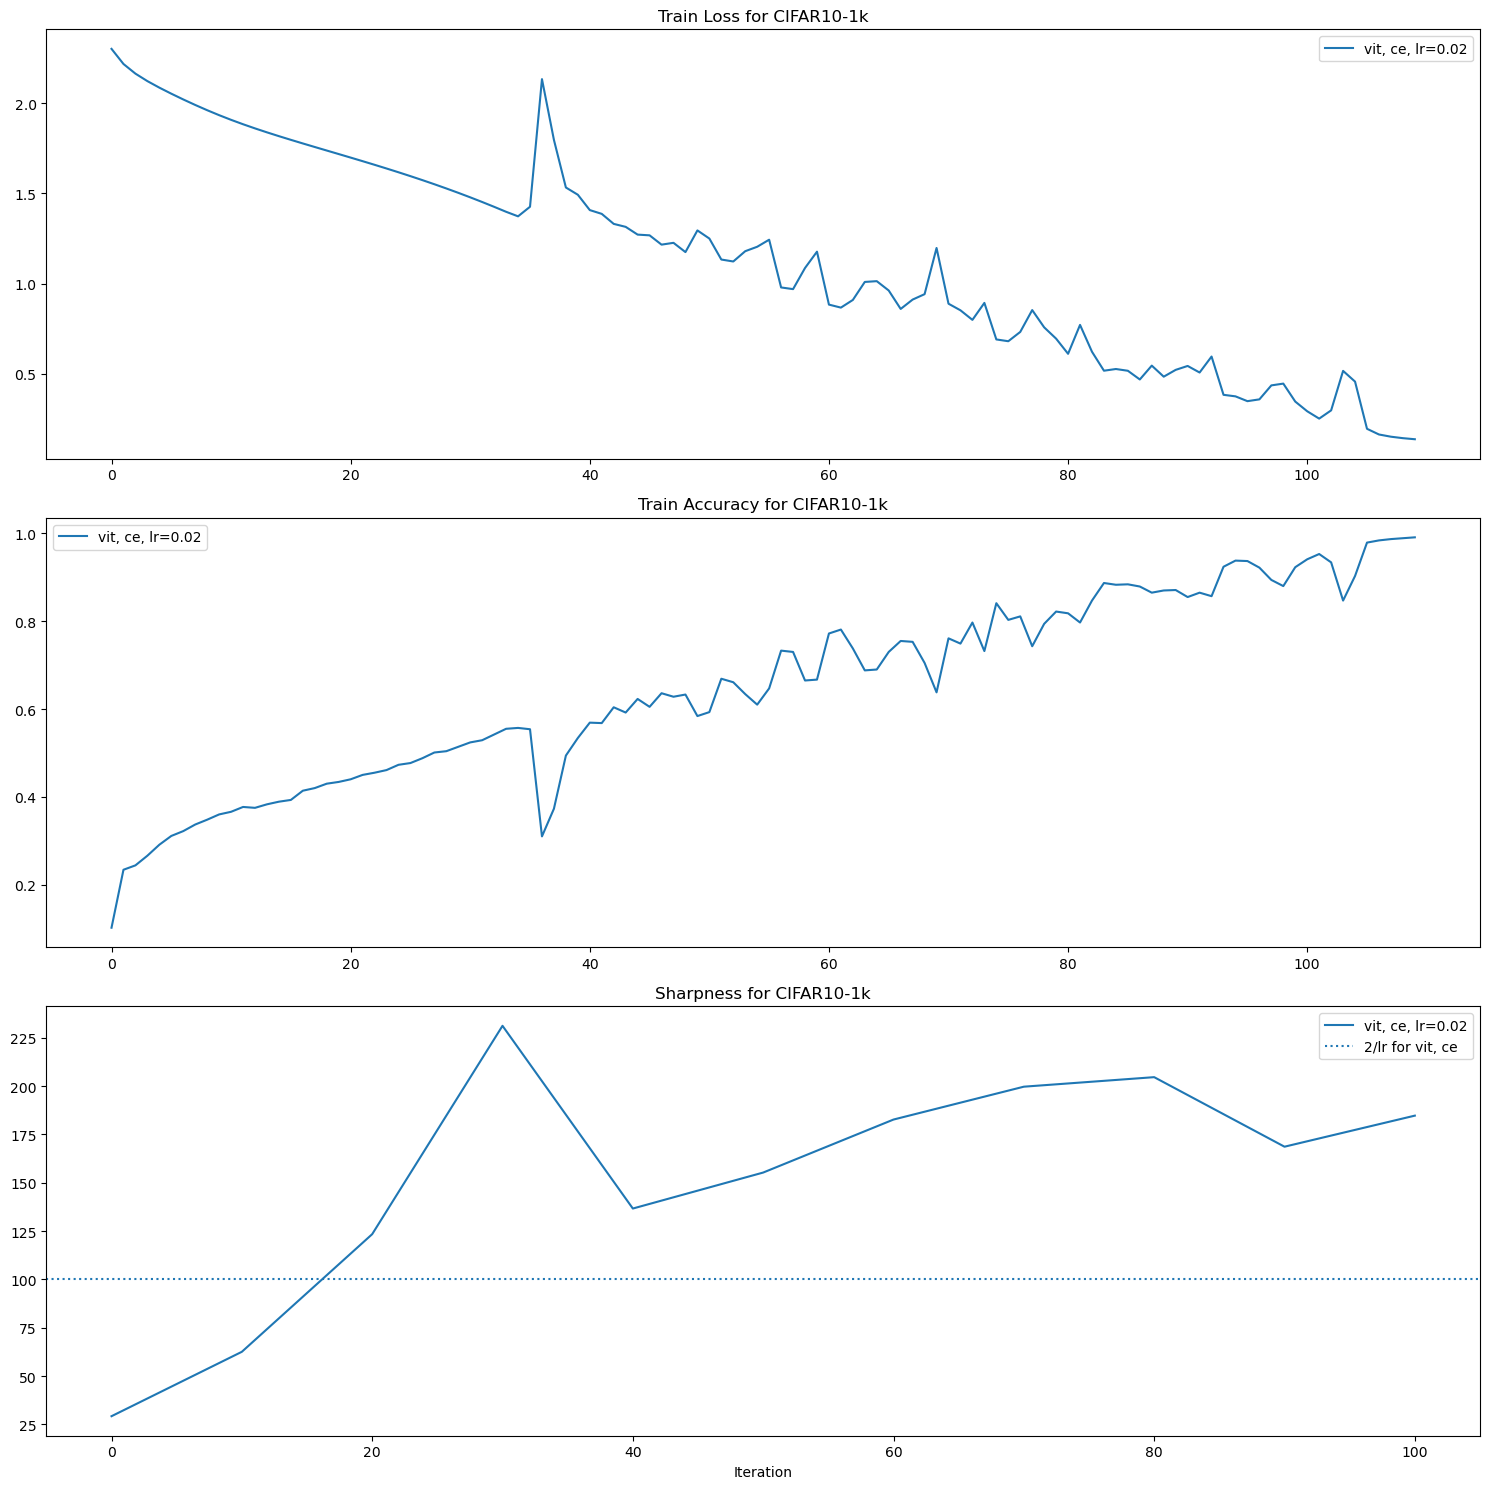

In [6]:
cifar10_1k_configs = [
    # ("cifar10-vit-10k", "vit", "mse", 0.02),
    ("cifar10-vit-1k", "vit", "ce", 0.02),
    # ("cifar10-vit-1k", "vit", "mse", 0.02),
    ("cifar10-vit-20k", "vit", "ce", 0.02)
]

plt.figure(figsize=(15, 15), dpi=100)

# Plot train loss
plt.subplot(3, 1, 1)
for dataset, arch, loss, lr in cifar10_1k_configs:
    gd_directory = f"{environ['RESULTS']}/{dataset}/{arch}/seed_0/{loss}/gd/lr_{lr}"
    if os.path.exists(f"{gd_directory}/train_loss_final"):
        gd_train_loss = torch.load(f"{gd_directory}/train_loss_final")
        plt.plot(gd_train_loss[:], label=f"{arch}, {loss}, lr={lr}")
plt.title("Train Loss for CIFAR10-1k")
plt.legend()

# Plot train accuracy
plt.subplot(3, 1, 2)
for dataset, arch, loss, lr in cifar10_1k_configs:
    gd_directory = f"{environ['RESULTS']}/{dataset}/{arch}/seed_0/{loss}/gd/lr_{lr}"
    if os.path.exists(f"{gd_directory}/train_acc_final"):
        gd_train_acc = torch.load(f"{gd_directory}/train_acc_final")
        plt.plot(gd_train_acc[:], label=f"{arch}, {loss}, lr={lr}")
plt.title("Train Accuracy for CIFAR10-1k")
plt.legend()

# Plot sharpness
plt.subplot(3, 1, 3)
gd_eig_freq = 10  # Assuming this is the same for all configs
for dataset, arch, loss, lr in cifar10_1k_configs:
    gd_directory = f"{environ['RESULTS']}/{dataset}/{arch}/seed_0/{loss}/gd/lr_{lr}"
    if os.path.exists(f"{gd_directory}/eigs_final"):
        gd_sharpness = torch.load(f"{gd_directory}/eigs_final")[:100, 0]
        plt.plot(torch.arange(len(gd_sharpness)) * gd_eig_freq, gd_sharpness, label=f"{arch}, {loss}, lr={lr}")
        plt.axhline(2. / lr, linestyle='dotted', color=plt.gca().lines[-1].get_color(), label=f"2/lr for {arch}, {loss}")
plt.title("Sharpness for CIFAR10-1k")
plt.xlabel("Iteration")
plt.legend()

plt.tight_layout()
# plt.savefig("cifar10_1k_results.png")
plt.show()

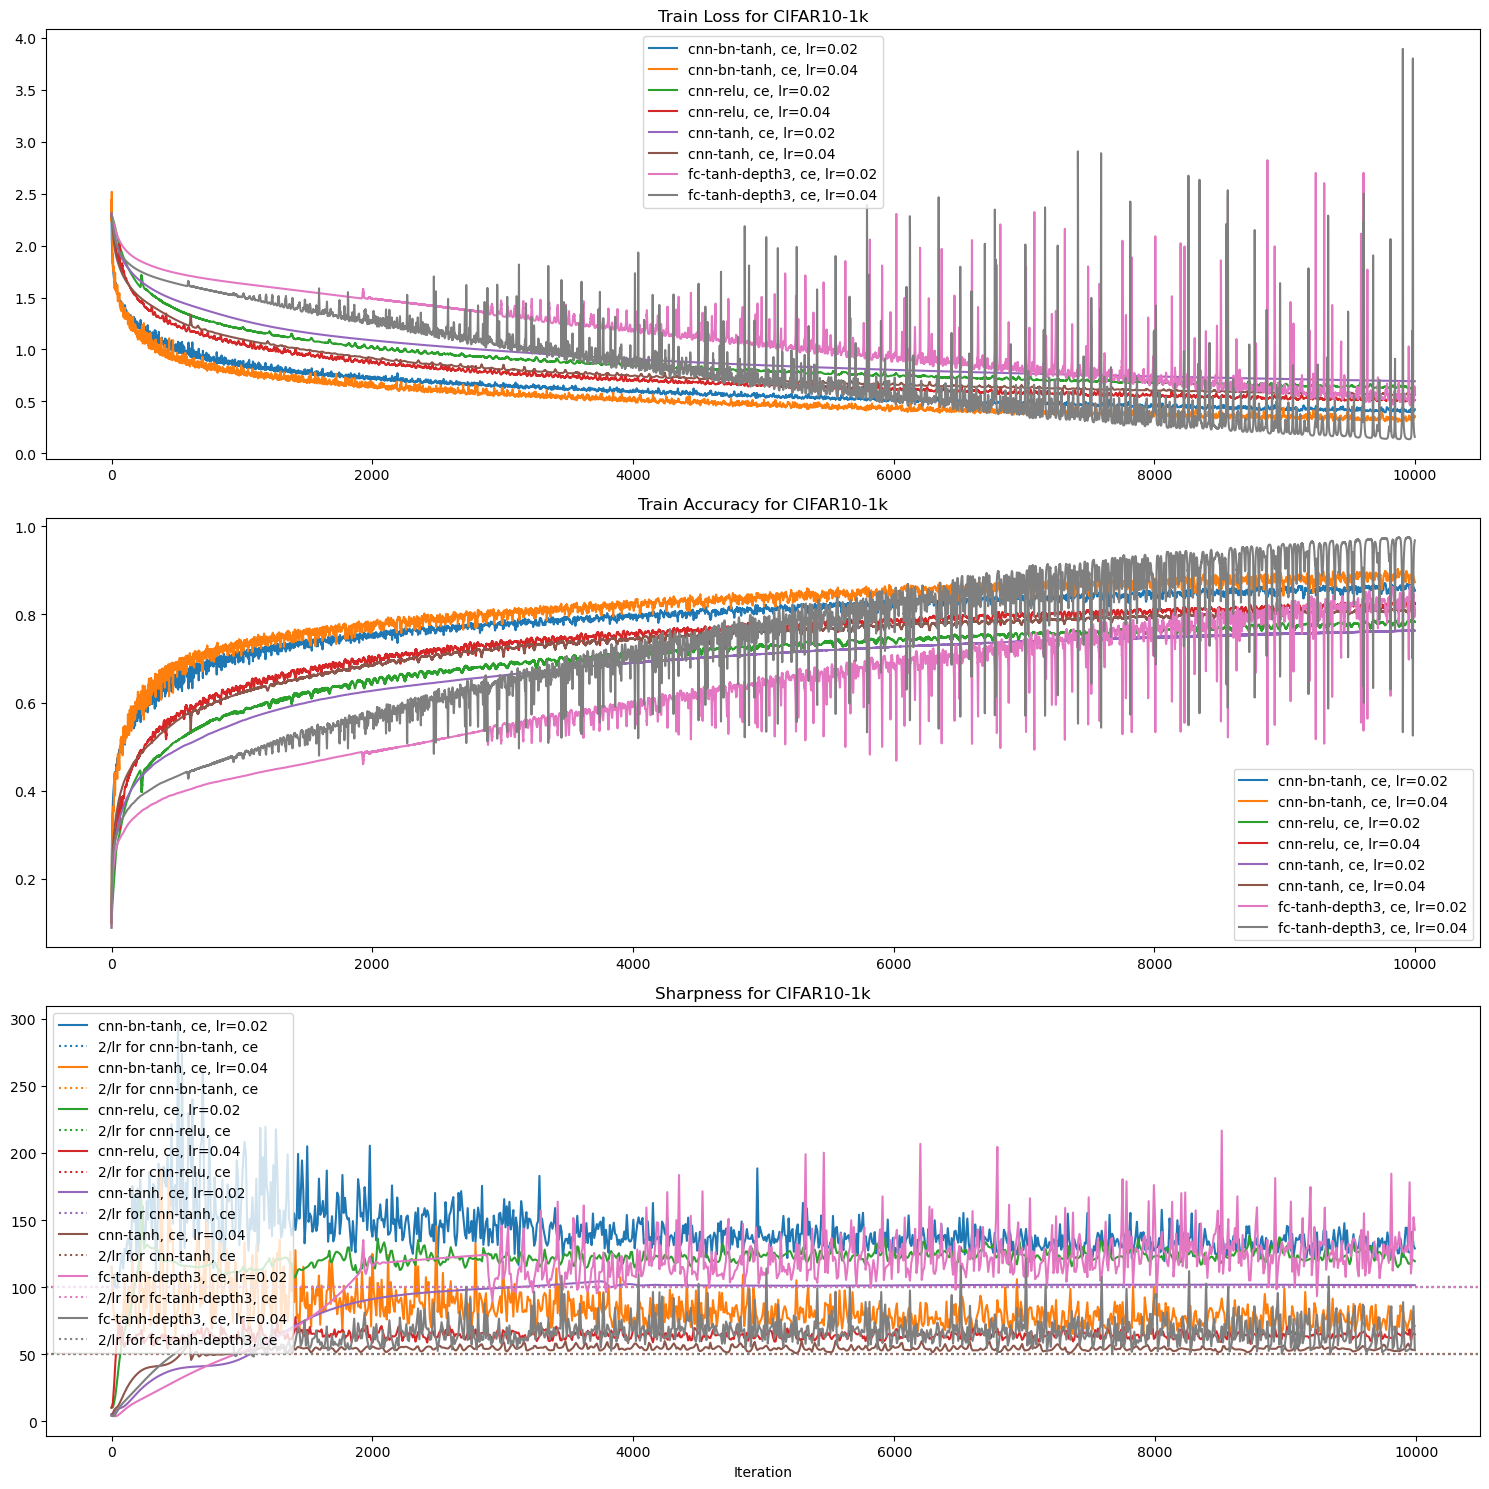

In [8]:
cifar10_1k_configs = [
    ("cifar10", "cnn-bn-tanh", "ce", 0.02),
    ("cifar10", "cnn-bn-tanh", "ce", 0.04),
    ("cifar10", "cnn-relu", "ce", 0.02),
    ("cifar10", "cnn-relu", "ce", 0.04),
    ("cifar10", "cnn-tanh", "ce", 0.02),
    ("cifar10", "cnn-tanh", "ce", 0.04),
    ("cifar10", "fc-tanh-depth3", "ce", 0.02),
    ("cifar10", "fc-tanh-depth3", "ce", 0.04)
]

plt.figure(figsize=(15, 15), dpi=100)

# Plot train loss
plt.subplot(3, 1, 1)
for dataset, arch, loss, lr in cifar10_1k_configs:
    gd_directory = f"{environ['RESULTS']}/{dataset}/{arch}/seed_0/{loss}/gd/lr_{lr}"
    if os.path.exists(f"{gd_directory}/train_loss_final"):
        gd_train_loss = torch.load(f"{gd_directory}/train_loss_final")
        plt.plot(gd_train_loss[:], label=f"{arch}, {loss}, lr={lr}")
plt.title("Train Loss for CIFAR10-1k")
plt.legend()

# Plot train accuracy
plt.subplot(3, 1, 2)
for dataset, arch, loss, lr in cifar10_1k_configs:
    gd_directory = f"{environ['RESULTS']}/{dataset}/{arch}/seed_0/{loss}/gd/lr_{lr}"
    if os.path.exists(f"{gd_directory}/train_acc_final"):
        gd_train_acc = torch.load(f"{gd_directory}/train_acc_final")
        plt.plot(gd_train_acc[:], label=f"{arch}, {loss}, lr={lr}")
plt.title("Train Accuracy for CIFAR10-1k")
plt.legend()

# Plot sharpness
plt.subplot(3, 1, 3)
gd_eig_freq = 10  # Assuming this is the same for all configs
for dataset, arch, loss, lr in cifar10_1k_configs:
    gd_directory = f"{environ['RESULTS']}/{dataset}/{arch}/seed_0/{loss}/gd/lr_{lr}"
    if os.path.exists(f"{gd_directory}/eigs_final"):
        gd_sharpness = torch.load(f"{gd_directory}/eigs_final")[:, 0]
        plt.plot(torch.arange(len(gd_sharpness)) * gd_eig_freq, gd_sharpness, label=f"{arch}, {loss}, lr={lr}")
        plt.axhline(2. / lr, linestyle='dotted', color=plt.gca().lines[-1].get_color(), label=f"2/lr for {arch}, {loss}")
plt.title("Sharpness for CIFAR10-1k")
plt.xlabel("Iteration")
plt.legend()

plt.tight_layout()
# plt.savefig("cifar10_1k_results.png")
plt.show()